In [26]:
import pandas as pd
import datetime as dt
import numpy as np

In [27]:
with open("MANU.csv") as f:
    stock_price = pd.read_csv(f, parse_dates=[0])

<Axes: xlabel='Date'>

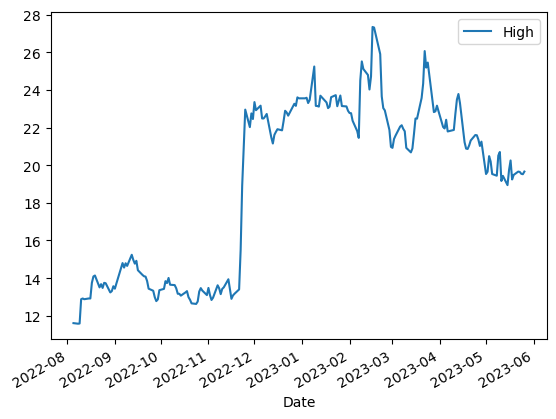

In [28]:
stock_price.plot.line(y='High', x = 'Date')

In [29]:
with open("results.csv") as f:
    results = pd.read_csv(f, parse_dates=[2], date_format='%d/%m/%Y %H:%M')
results['Date'] = results['Date'].dt.date

In [30]:
def points_from_game(row: pd.Series) -> int:
    score = list(map(int, row['Result'].split('-')))
    if score[0] == score[1]:
        return 1 
    match row['Home Team']:
        case 'Man Utd':
            return 3 * (score[0]>score[1])
        case _:
            return 3 * (score[0]<score[1])

In [31]:
results['Point'] = results.apply(points_from_game, axis=1)

In [32]:
results['TotalPoints'] = results['Point'].cumsum()

In [33]:
def next_weekday(d: dt.datetime) -> dt.datetime:
    day = d.isoweekday()
    if day in {5,6,7}:
        return d + dt.timedelta(8 - day)
    return d + dt.timedelta(1)

In [34]:
results['NextWeekday'] = results['Date'].apply(next_weekday)

In [35]:
joined = stock_price.set_index('Date').pct_change().join(results.set_index('NextWeekday'), how='inner')

In [36]:
joined['Open']+=1

In [37]:
joined.head()

,Open,High,Low,Close,Adj Close,Volume,Match Number,Round Number,Date,Location,Home Team,Away Team,Result,Point,TotalPoints
2022-08-08,0.992248,-0.002584,-0.013216,0.003475,0.003475,0.114390,9,1,2022-08-07,Old Trafford,Man Utd,Brighton,1 - 2,0,0
2022-08-15,1.037398,0.003106,0.021138,-0.003900,-0.003900,-0.696576,13,2,2022-08-13,Brentford Community Stadium,Brentford,Man Utd,4 - 0,0,0
2022-08-23,0.984444,0.012583,-0.001515,0.011312,0.011312,-0.261597,27,3,2022-08-22,Old Trafford,Man Utd,Liverpool,2 - 1,3,3
2022-08-29,0.965365,-0.035688,-0.011424,-0.005327,-0.005327,0.650414,39,4,2022-08-27,St. Mary's Stadium,Southampton,Man Utd,0 - 1,3,6
2022-09-02,1.011236,0.020833,0.002261,0.005224,0.005224,-0.240774,45,5,2022-09-01,King Power Stadium,Leicester,Man Utd,0 - 1,3,9


<Axes: xlabel='Date'>

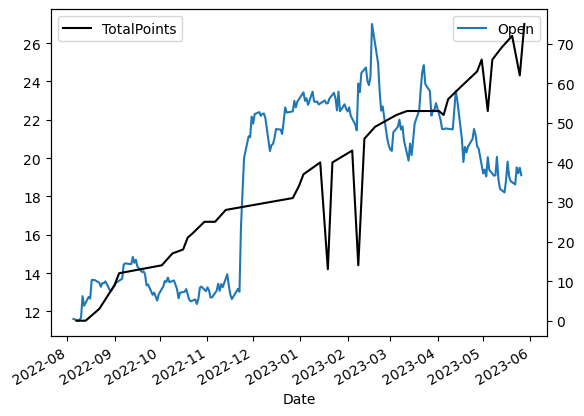

In [38]:
ax1 = stock_price.plot(x='Date', y='Open')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
results.plot(x='Date', y='TotalPoints',ax=ax2, colormap = 'magma')

In [39]:
joined['LR'] = np.log(joined['Open'])

<Axes: >

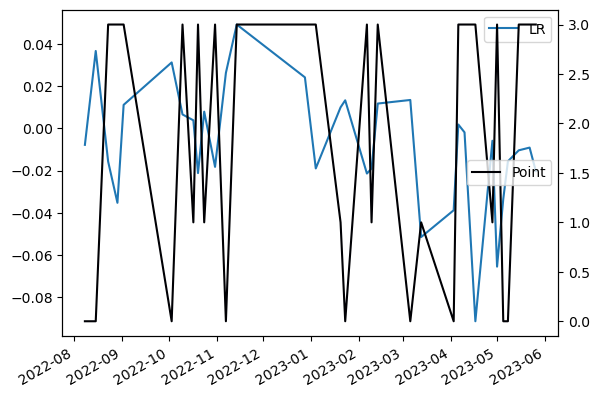

In [40]:
ax1 = joined.plot(y='LR')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
joined.plot(y='Point',ax=ax2, colormap = 'magma')

In [41]:
joined[['Point', 'LR']].corr()

,Point,LR
Point,1.000000,-0.210511
LR,-0.210511,1.000000
